In [1]:
from SquareGrid import SquareGrid
import torch.nn.functional as tnn
import torch
use_cuda = 0
torchdeviceId = torch.device('cuda:0') if use_cuda else 'cpu'
torchdtype = torch.float64
import time 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [2]:
l=32
G=SquareGrid(l)

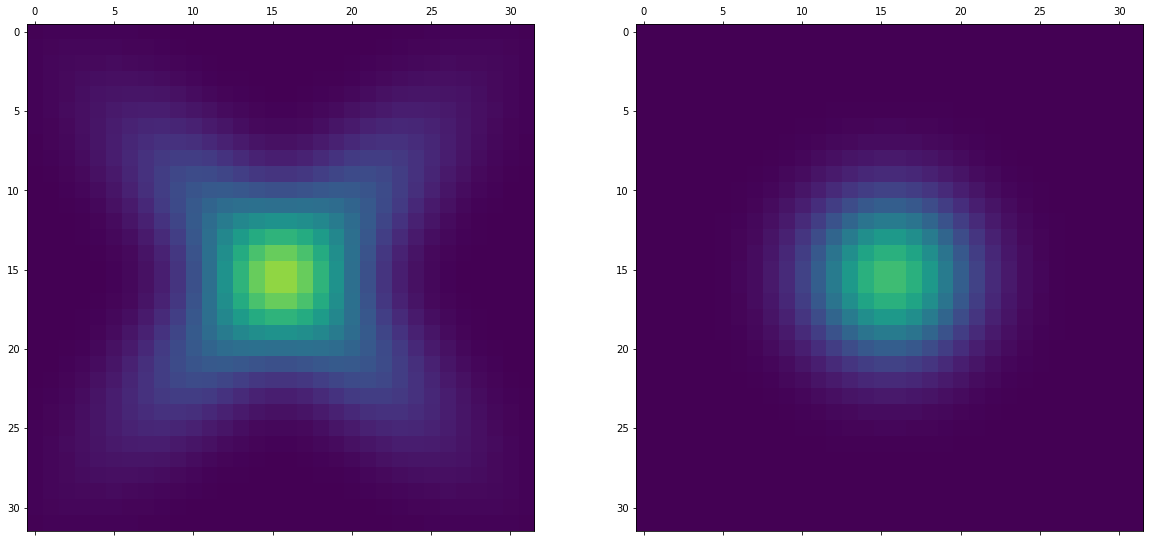

In [3]:
G1=torch.Tensor([[10,0],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G2=torch.Tensor([[10,16],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G3=torch.Tensor([[10,-16],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
mu_2 = G.gaussian(0,0,G1)

mu_1 = 2*G.normalize(G.gaussian(0,0,G2)+G.gaussian(0,0,G3))

G.plot_pair(mu_1,mu_2)

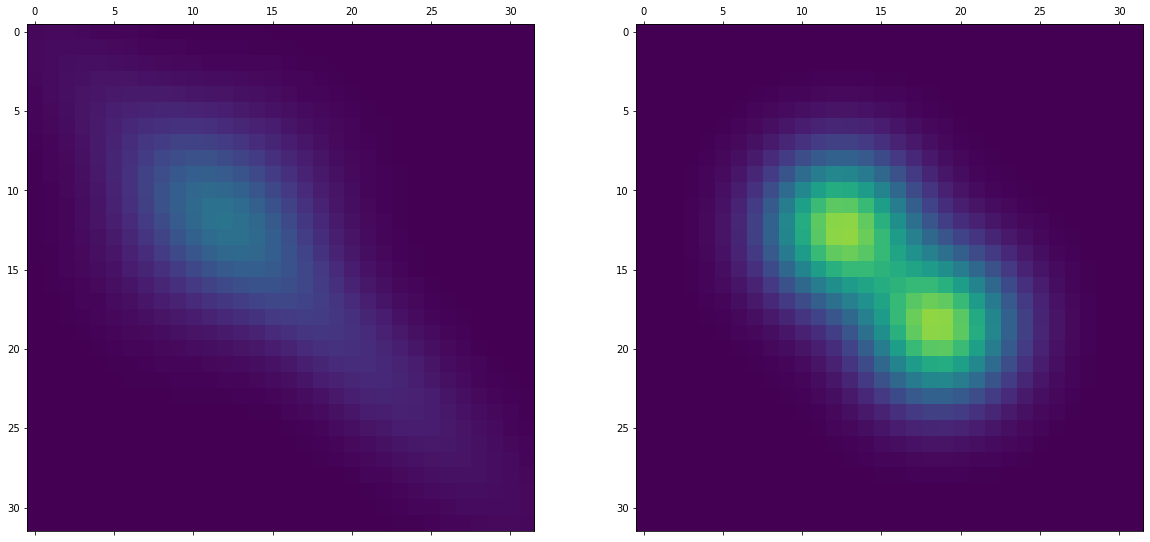

In [4]:
G1=torch.Tensor([[12,0],[0,12]]).to(dtype=torchdtype, device=torchdeviceId)
G2=torch.Tensor([[10,-18],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G3=torch.Tensor([[7,0],[0,7]]).to(dtype=torchdtype, device=torchdeviceId)
mu_2 = 2*G.normalize(G.gaussian(.2,.2,G1)+ G.gaussian(-.2,-.2,G1))

mu_1 = G.normalize(G.gaussian(0,0,G2)+G.gaussian(-.25,-.25,G3))

G.plot_pair(mu_1,mu_2)

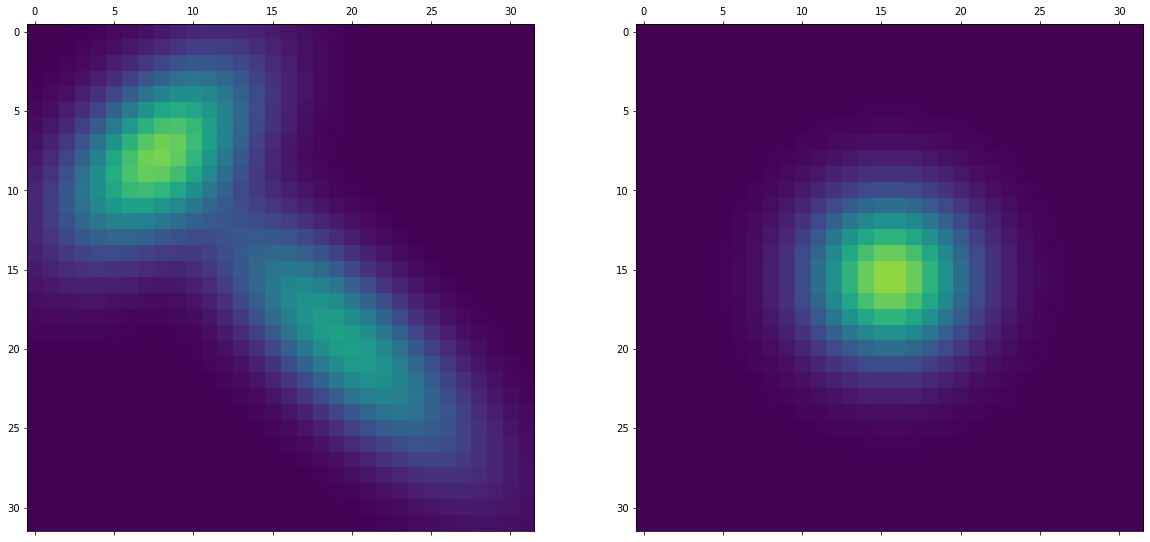

In [5]:
G1=torch.Tensor([[10,0],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G2=torch.Tensor([[10,10],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G3=torch.Tensor([[10,-15],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
mu_2 = G.gaussian(0,0,G1)

mu_1 = 2*G.normalize(G.gaussian(-.5,-.5,G2)+G.gaussian(.25,.25,G3))

G.plot_pair(mu_1,mu_2)

C:\Users\emanh\AppData\Roaming\Python\Python39\site-packages\torch\nn\functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


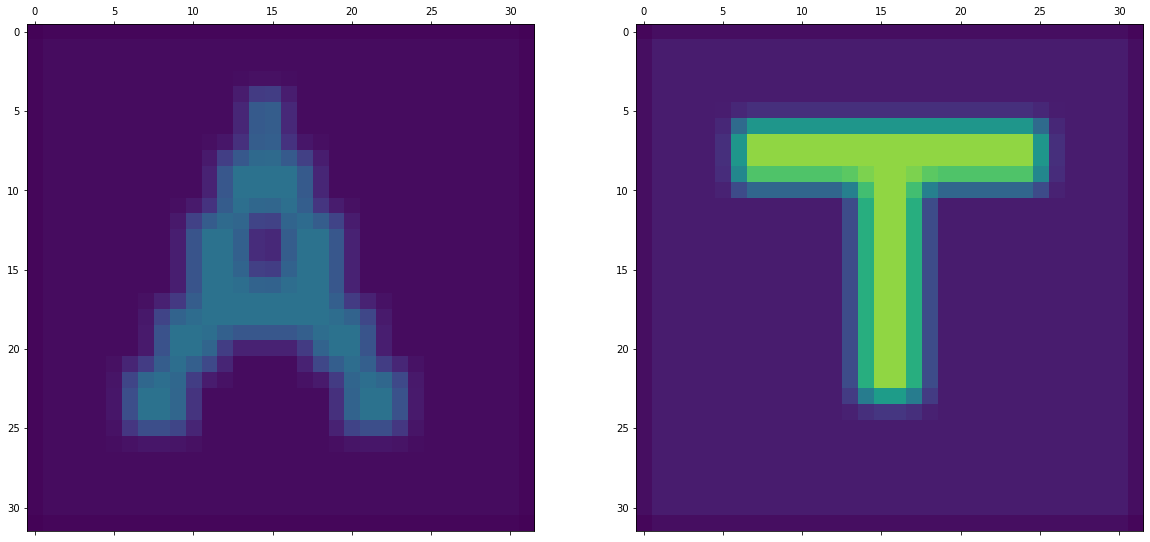

In [6]:
mu_2 = G.load_dist_inv("data/T.png")*2
mu_1 = G.load_dist_inv("data/A.png")
G.plot_pair(mu_1,mu_2)

In [7]:
T=6
match_coeff=10000000000
path_coeff=1
delta=1

In [8]:
def L(out):
    out.reshape(2,grid.shape[1],grid.shape[1])
    #out=torch.unsqueeze(out,0)
    #weight = torch.Tensor([[[[10,10,10],[10,0,10],[10,10,10]]]]).to(dtype=torchdtype, device=torchdeviceId)
    #out = tnn.conv2d(out,weight.repeat(2,1,1,1), padding='same',groups=2)
    #out = tnn.conv2d(out,weight.repeat(2,1,1,1), padding='same',groups=2)
    #out = tnn.conv2d(out,weight.repeat(2,1,1,1), padding='same',groups=2)
    return out

In [9]:
start =time.time()
vecs,funs,ps = G.OUT(mu_1.flatten(),mu_2.flatten(),T,match_coeff,path_coeff,delta,max_iter=1000)
pl_pathlength = G.path_length(mu_1.flatten(),vecs,funs,delta)
N=vecs.shape[0]

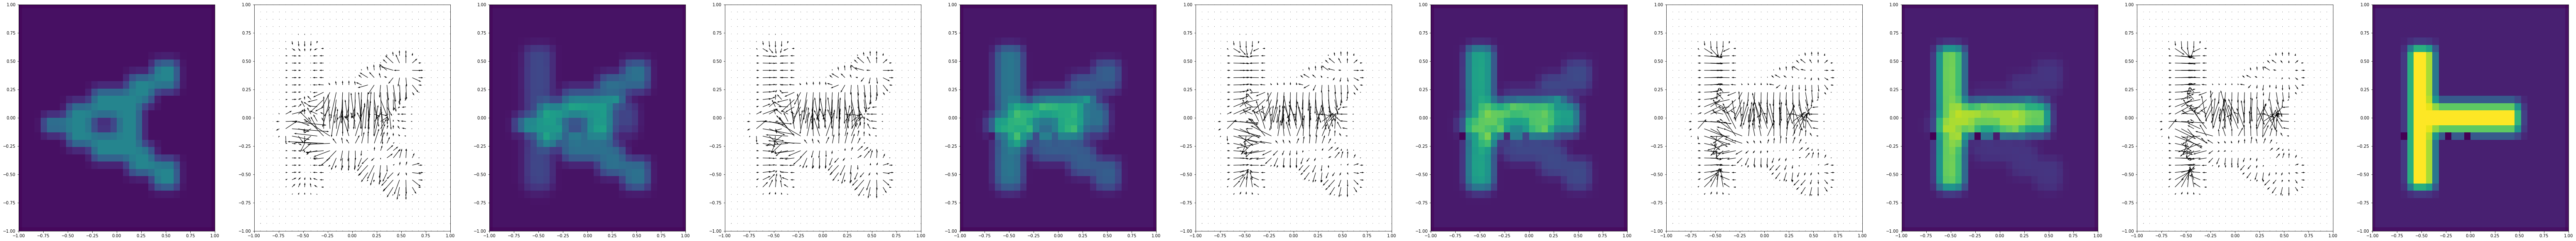

In [10]:
G.plot_sequence(ps,vecs)
G.save_gif(ps)

In [11]:
print(pl_pathlength.sum())

tensor(2.8477, dtype=torch.float64)
